In [8]:
%cd Occlusion-Free-Hand-Tracking/

d:\Google Drive\KIT\lab\hand-tracking\Occlusion-Free-Hand-Tracking


In [9]:
%ls

 �h���C�u D �̃{�����[�� ���x���� 2nd SSD �ł�
 �{�����[�� �V���A���ԍ��� EE9C-2E90 �ł�

 d:\Google Drive\KIT\lab\hand-tracking\Occlusion-Free-Hand-Tracking �̃f�B���N�g��

2024/03/16  13:26    <DIR>          .
2024/03/16  17:14    <DIR>          ..
2024/03/16  17:12    <DIR>          .git
2023/12/10  19:49                66 .gitattributes
2024/02/21  12:15             3,148 .gitignore
2024/03/16  13:26    <DIR>          .vscode
2024/03/16  13:26    <DIR>          doc
2024/03/16  13:26    <DIR>          FastSAM
2023/12/06  21:12            35,182 LICENCE
2024/03/16  18:19    <DIR>          model_checkpoint
2024/03/16  13:26    <DIR>          output
2024/01/22  17:11             2,252 README.md
2024/03/16  13:26    <DIR>          record
2024/01/25  13:06               172 requirements.txt
2023/12/06  22:07             1,969 requirements_full_python3.11.txt
2024/03/16  13:26    <DIR>          resource
2024/02/28  12:34             1,859 run.py
2024/03/16  18:25    <DIR>          src
        

In [51]:
import matplotlib.pyplot as plt
import numpy as np

def visualize_masks(masks):
	h, w = masks[0].shape[:2]
	result = np.zeros((h, w, 3), dtype=np.uint8)
	for m in masks:
		color = (np.random.random(3)*255).astype(np.uint8)
		result[m, :] = color

	return result

from collections import deque
import time
class Fps_Counter:
	def __init__(self, cache_size=30):
		self.fps = -1
		self.cache_size = cache_size
		self.init()

	def init(self):
		self.__cache = deque(maxlen=self.cache_size)
		self.__timestamp = time.time()
		self.fps = 0


	def count(self):
		t = time.time()
		self.__cache.append(t - self.__timestamp)
		self.__timestamp = t

		ave = np.mean(self.__cache)
		self.fps = 1 / ave if ave != 0 else 0

		return self.fps

In [62]:
from mobile_sam import sam_model_registry, SamAutomaticMaskGenerator, SamPredictor
import torch
import cv2

model_type = "vit_t"
sam_checkpoint = "model_checkpoint\mobile_sam.pt"

device = "cuda" if torch.cuda.is_available() else "cpu"

mobile_sam = sam_model_registry[model_type](checkpoint=sam_checkpoint)
mobile_sam.to(device=device)
mobile_sam.eval()
mask_generator = SamAutomaticMaskGenerator(mobile_sam, points_per_side=5, points_per_batch=120)

In [63]:
img = cv2.imread(r"D:\Google Drive\KIT\lab\hand-tracking\Occlusion-Free-Hand-Tracking\output\ex7_p1_1_\rgb\00180.png")

# predictor = SamPredictor(mobile_sam)
# predictor.set_image(img)
# masks, _, _ = predictor.predict(<input_prompts>)

fps_counter = Fps_Counter()
for i in range(50):
	masks = mask_generator.generate(img)
	print(fps_counter.count())

10.712298328910638
11.243516815800902
11.356326528033618
11.498497339760219
11.643534891984476
11.708410797532311
11.786506195315527
11.835624014783582
11.88093114368571
11.919056320137312
11.949389067207656
11.950083384300958
11.957186017233399
11.970143266008366
11.98449500472697
11.99700811612857
12.00386800304915
11.969988727222567
11.988173056079601
12.018691521834594
12.031974751541076
12.048773443120849
12.067591729103691
12.074414630170487
12.064040512909486
12.06597989702328
12.081290122294487
12.08245540267251
12.075548662196748
12.047576723532176
12.085535415630359
12.100055649298067
12.120889159121521
12.126513680514678
12.121736883737155
12.14134347901182
12.124364882822201
12.133926388798484
12.143546349527737
12.142341702147617
12.146703237351213
12.16082555409073
12.173229272762734
12.165809649334497
12.17575358262177
12.180892602459176
12.190888383173453
12.197099448785734
12.169627789384176
12.162991999028732


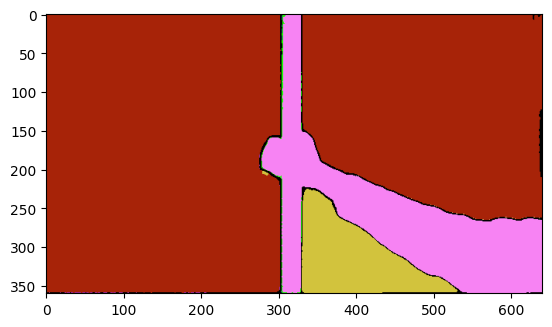

In [66]:
masks_seg = [m['segmentation'] for m in masks]
result = visualize_masks(masks_seg)

plt.imshow(result)

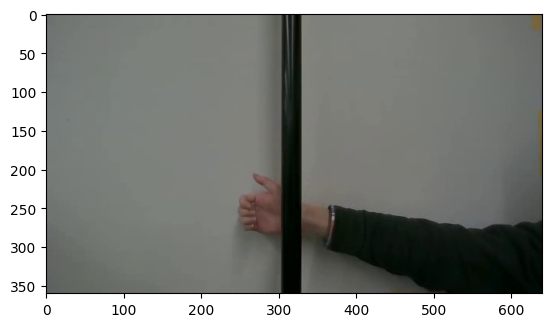

In [49]:
plt.imshow(cv2.cvtColor(img, cv2.COLOR_BGR2RGB))